In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('/content/DIAssignment.csv')
data = pd.DataFrame(data)

In [2]:
data.head()

,Unnamed: 0,bike_id,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0,bike_21062,0.261905,Model_4,305,59,Decent,0.976820
1,1,bike_11582,0.261905,Model_4,136,11,Decent,0.687972
2,2,bike_19932,0.261905,Model_4,209,90,Bad,0.475168
3,3,bike_21418,0.261905,Model_4,221,17,Good,0.756067
4,4,bike_6349,0.261905,Model_4,1778,91,Good,0.986102


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2848 non-null   int64  
 1   bike_id                  2848 non-null   object 
 2   age_scaled               2848 non-null   float64
 3   model_type               2848 non-null   object 
 4   no_of_riding_sessions    2848 non-null   int64  
 5   no_of_charging_sessions  2848 non-null   int64  
 6   charging_behavior        2848 non-null   object 
 7   mileage_km_per_soc       2848 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 178.1+ KB


In [4]:
data.describe()

,Unnamed: 0,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,1423.500000,0.213617,895.797402,108.694522,0.886865
std,822.291108,0.206463,604.446765,81.673720,0.143127
min,0.000000,0.000000,6.000000,3.000000,0.001654
25%,711.750000,0.071429,449.000000,48.000000,0.806110
50%,1423.500000,0.142857,759.000000,93.000000,0.878671
75%,2135.250000,0.309524,1216.000000,144.000000,0.957420
max,2847.000000,0.976190,5140.000000,762.000000,1.979403


In [5]:
data.shape

(2848, 8)

In [6]:
data.drop(['Unnamed: 0','bike_id'],axis = 'columns',inplace = True)

In [7]:
data.groupby(['model_type', 'charging_behavior']).mean()

age_scaled  no_of_riding_sessions  \
model_type charging_behavior                                      
Model_1    Bad                  0.803571             869.714286   
           Decent               0.798288             511.146067   
           Good                 0.800454             443.142857   
Model_2    Bad                  0.532999             888.982456   
           Decent               0.544959             617.601064   
           Good                 0.542961             490.717391   
Model_3    Bad                  0.127922            1163.209091   
           Decent               0.108539             901.241379   
           Good                 0.102960             734.864865   
Model_4    Bad                  0.156850            1145.046154   
           Decent               0.140474             972.706165   
           Good                 0.157913             684.250000   

                              no_of_charging_sessions  mileage_km_per_soc  
model_type charging_behavior                                               
Model_1    Bad                             181.428571            0.864402  
           Decent                           83.235955            0.813273  
           Good                             47.714286            0.739205  
Model_2    Bad                             184.789474            0.870973  
           Decent                           95.792553            0.840499  
           Good                             49.195652            0.848932  
Model_3    Bad                             176.572727            0.923682  
           Decent                           97.186207            0.909827  
           Good                             44.459459            0.924292  
Model_4    Bad                             178.704615            0.895861  
           Decent                          109.964772            0.892296  
           Good                             50.465686            0.886484

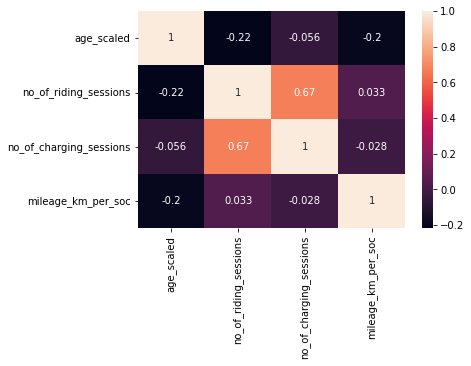

In [8]:
sns.heatmap(data.corr(),annot = True)

•	Assumption: It is not fair to come to conclusion regarding influence on mileage by given attributes according to me. Because each vehicle model might have other attributes which are influencing mileage like vehicle weight, battery power, efficiency etc. So, I have decided to make assumptions on mileage by sub-setting data based on Vehicle models and further check the performance of each model with respect to charging behaviour.

•	 **Additional attributes that could improve the study**:  Battery storage power, Vehicle weight, Battery degradation with respect to speed, riding behaviour as riding style is necessary while predicting mileage.




•	 **The limitations of the approach**: If all the models having same specifications.

In [158]:
model1 = data[data['model_type'] == 'Model_1'].reset_index()
model2 = data[data['model_type'] == 'Model_2'].reset_index()
model3 = data[data['model_type'] == 'Model_3'].reset_index()
model4 = data[data['model_type'] == 'Model_4'].reset_index()

#Model 1

In [94]:
model1.drop(['index','model_type'],axis = 'columns',inplace = True)

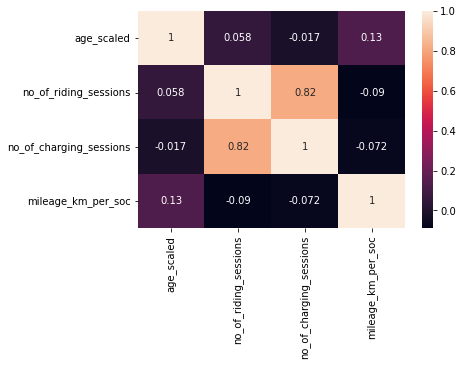

In [95]:
sns.heatmap(model1.corr(),annot = True)

•	Using scatter plot against age_scaled, no_of_charging_sessions and no_of_riding_sessions vs mileage. Removed some data points which I feel they look like outliers. After removing some data points the correlation between mileage and other attributes has been changed with respect to riding sessions and battery sessions.

Text(0, 0.5, 'mileage')

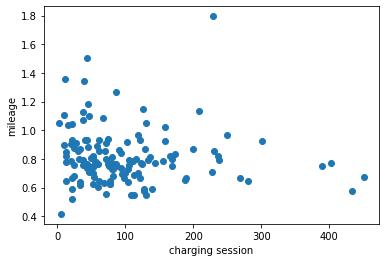

In [96]:
plt.scatter(model1['no_of_charging_sessions'],model1['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

In [97]:
model1[model1['mileage_km_per_soc'] > 1.6]

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
111,0.833333,949,229,Bad,1.794997


In [98]:
model1 = model1[model1['mileage_km_per_soc'] < 1.6]

Text(0, 0.5, 'mileage')

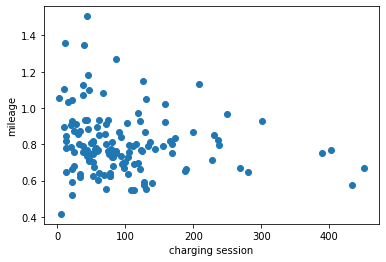

In [99]:
plt.scatter(model1['no_of_charging_sessions'],model1['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

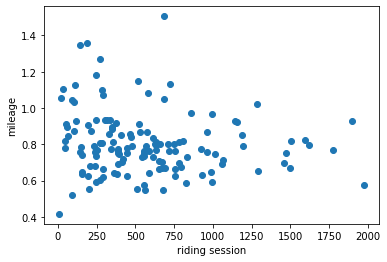

In [100]:
plt.scatter(model1['no_of_riding_sessions'],model1['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

In [101]:
model1[model1['mileage_km_per_soc'] > 1.4]

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
6,0.785714,686,44,Decent,1.505707


In [102]:
model1 = model1[model1['mileage_km_per_soc'] < 1.4]

Text(0, 0.5, 'mileage')

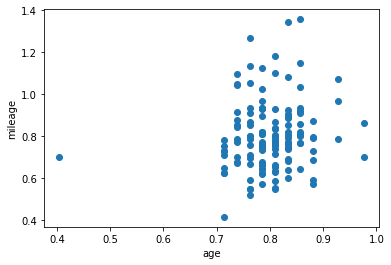

In [103]:
plt.scatter(model1['age_scaled'],model1['mileage_km_per_soc'])
plt.xlabel('age')
plt.ylabel('mileage')

In [104]:
model1[model1['age_scaled'] < 0.6]

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
98,0.404762,669,100,Decent,0.701154


In [105]:
model1 = model1[model1['age_scaled'] > 0.6]

Text(0, 0.5, 'mileage')

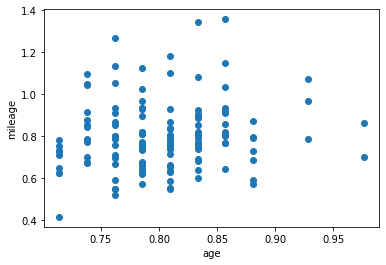

In [106]:
plt.scatter(model1['age_scaled'],model1['mileage_km_per_soc'])
plt.xlabel('age')
plt.ylabel('mileage')

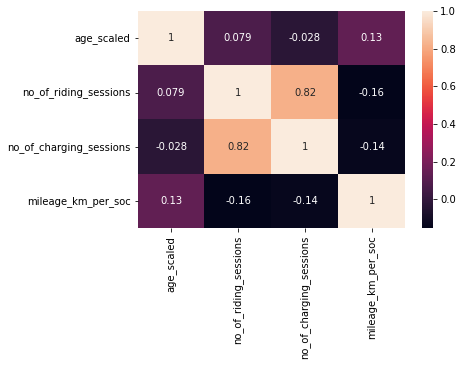

In [107]:
sns.heatmap(model1.corr(),annot = True)

•	We can see there is some correlation between Age scale and Mileage. Let’s subset the model1 dataset based on charging behaviour.
•	Subsetting model 1 data charging behaviour == Good, Bad and Decent. 


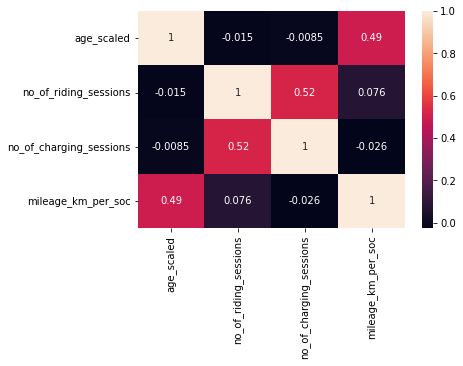

In [108]:
sns.heatmap((model1[model1['charging_behavior']== 'Good']).corr(),annot = True)

Model 1 vehicles with Good charging behaviour age scaled attribute is positively correlated with the mileage.

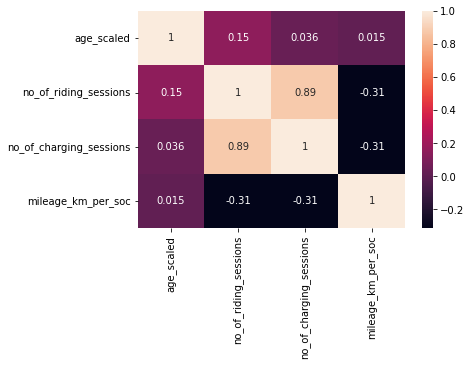

In [109]:
sns.heatmap((model1[model1['charging_behavior']== 'Bad']).corr(),annot = True)

•	Model 1 vehicles with Bad charging behaviour with riding and charging attributes are negatively correlated with the mileage.


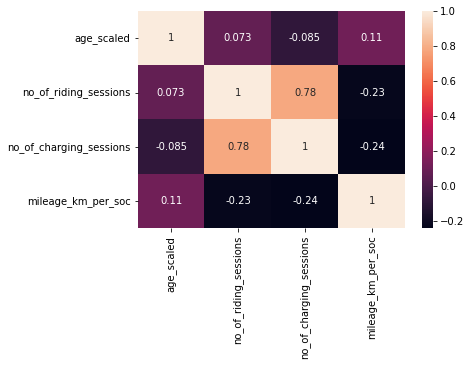

In [110]:
sns.heatmap((model1[model1['charging_behavior']== 'Decent']).corr(),annot = True)

•	Model 1 vehicles with Decent charging behaviour with riding and charging attributes are negatively correlated and age_scaled is positively correlated with the mileage.


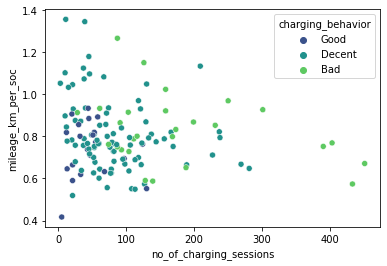

In [111]:
sns.scatterplot(x='no_of_charging_sessions',y='mileage_km_per_soc',data=model1,palette='viridis',hue='charging_behavior')

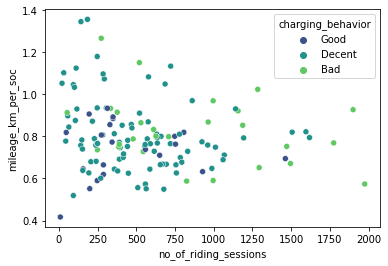

In [112]:
sns.scatterplot(x='no_of_riding_sessions',y='mileage_km_per_soc',data=model1,palette='viridis',hue='charging_behavior')

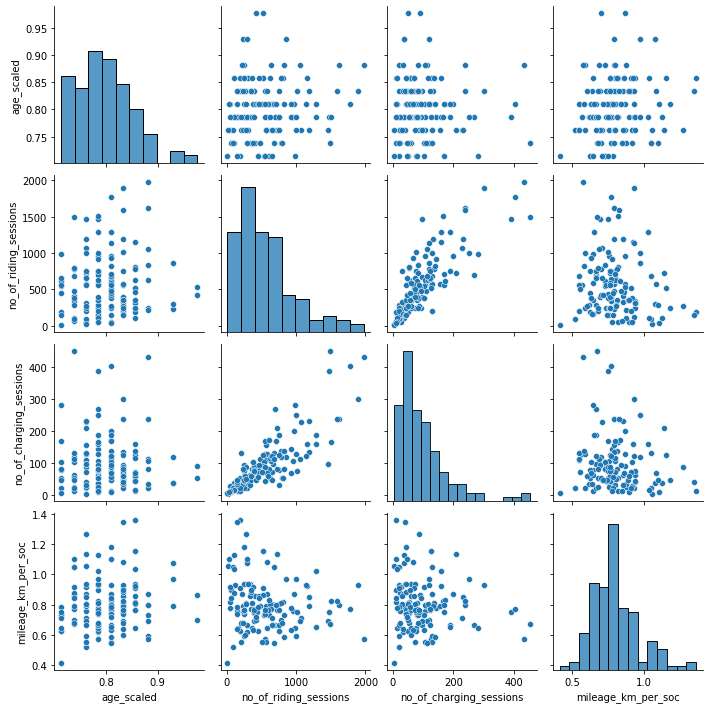

In [113]:
sns.pairplot(model1)

In [114]:
m = pd.get_dummies(model1)

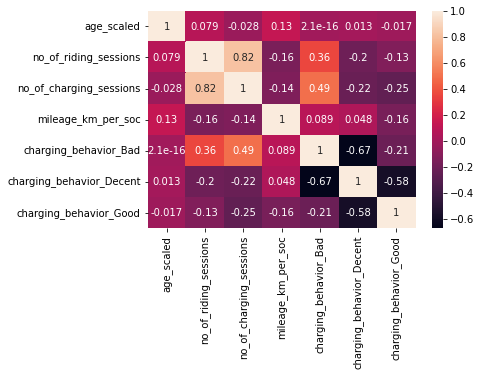

In [115]:
#m = pd.get_dummies(model1)
sns.heatmap(m.corr(),annot = True)

Text(0.5, 1.0, 'Model 1')

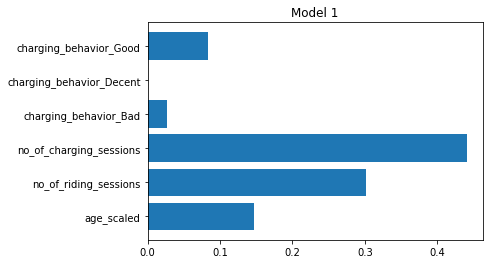

In [116]:
y = m['mileage_km_per_soc']
x = m.drop('mileage_km_per_soc',axis = 'columns')



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 10) 
regressor.fit(x,y)
regressor.feature_importances_
plt.barh(x.columns, regressor.feature_importances_)
plt.title('Model 1')

•	When the model 1 dataset is trained by Decision Tree regressor and this is the feature importance.

•	No_of_charging_session has the most influence on mileage followed by riding sessions and age scaled. Vehicles with good charging behaviour tends to have more mileage than vehicles with bad and decent charging behaviour.

In [117]:
m.head()

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc,charging_behavior_Bad,charging_behavior_Decent,charging_behavior_Good
0,0.785714,157,13,0.645910,0,0,1
1,0.785714,961,106,0.759129,0,1,0
2,0.785714,334,61,0.933774,1,0,0
3,0.785714,288,33,0.619221,0,0,1
4,0.785714,58,10,0.897821,0,1,0


In [118]:
m.head()

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc,charging_behavior_Bad,charging_behavior_Decent,charging_behavior_Good
0,0.785714,157,13,0.645910,0,0,1
1,0.785714,961,106,0.759129,0,1,0
2,0.785714,334,61,0.933774,1,0,0
3,0.785714,288,33,0.619221,0,0,1
4,0.785714,58,10,0.897821,0,1,0


#Model 2

In [159]:
model2.drop(['index','model_type'],axis = 'columns',inplace = True)

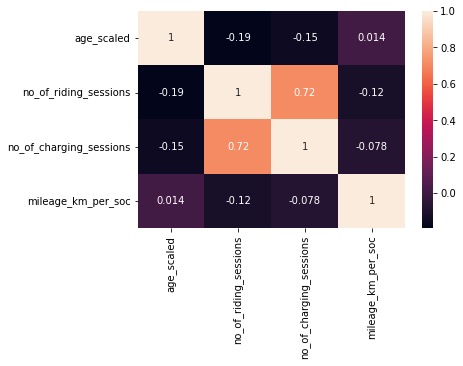

In [160]:
sns.heatmap(model2.corr(),annot = True)

Using scatter plot against age_scaled, no_of_charging_sessions and no_of_riding_sessions vs mileage. Removed some data points which I feel they look like outliers

Text(0, 0.5, 'mileage')

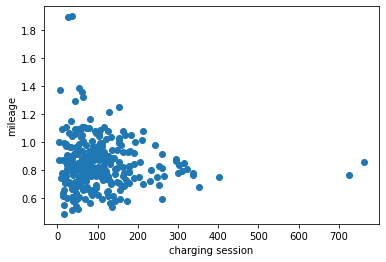

In [161]:
plt.scatter(model2['no_of_charging_sessions'],model2['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

In [162]:
model2[model2['mileage_km_per_soc'] > 1.7]

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
27,0.666667,362,36,Decent,1.895736
289,0.404762,441,27,Decent,1.890951


In [163]:
model2 = model2[model2['mileage_km_per_soc'] < 1.7]
model2 =  model2[model2['no_of_charging_sessions'] < 600]

Text(0, 0.5, 'mileage')

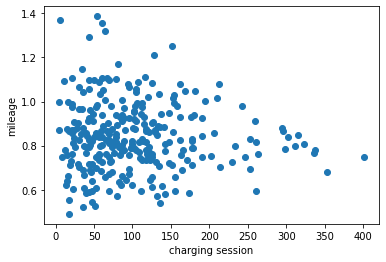

In [164]:
plt.scatter(model2['no_of_charging_sessions'],model2['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

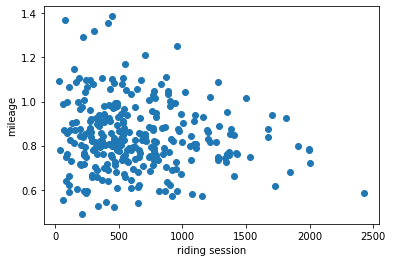

In [165]:
plt.scatter(model2['no_of_riding_sessions'],model2['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

In [166]:
model2 = model2[model2['no_of_riding_sessions'] < 2050]

Text(0, 0.5, 'mileage')

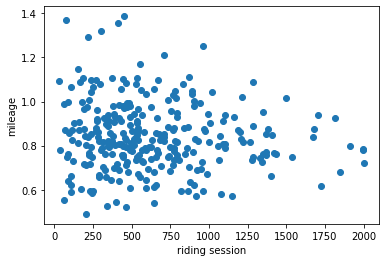

In [167]:
plt.scatter(model2['no_of_riding_sessions'],model2['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

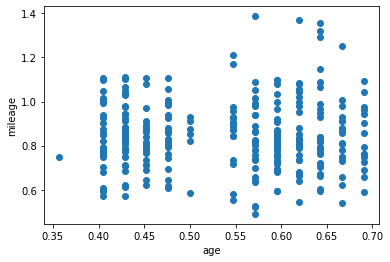

In [168]:
plt.scatter(model2['age_scaled'],model2['mileage_km_per_soc'])
plt.xlabel('age')
plt.ylabel('mileage')

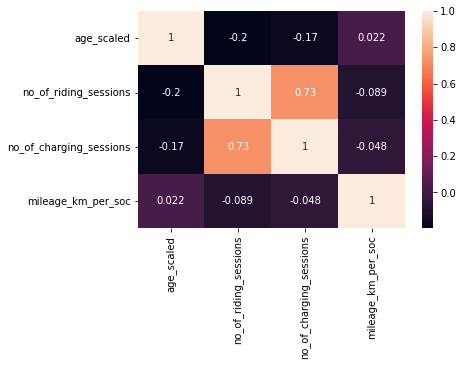

In [169]:
sns.heatmap(model2.corr(),annot = True)

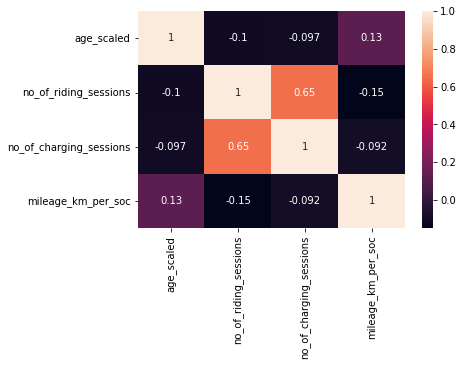

In [170]:
sns.heatmap((model2[model2['charging_behavior']== 'Good']).corr(),annot = True)

•	Model 2 vehicles with Good charging behaviour age scaled attribute is positively correlated with the mileage and mileage is negatively correlated with the no of riding sessions.

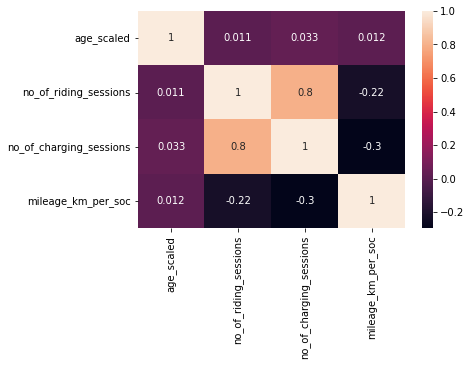

In [171]:
sns.heatmap((model2[model2['charging_behavior']== 'Bad']).corr(),annot = True)

•	Model 2 vehicles with Bad charging behaviour negatively correlated with the no of riding sessions.


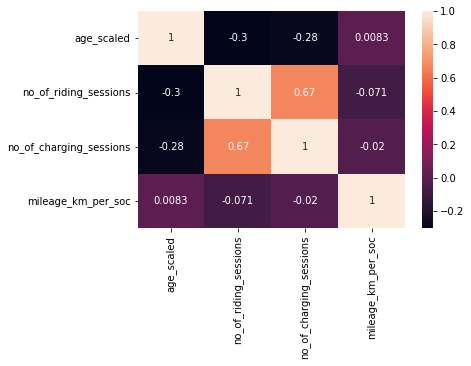

In [172]:
sns.heatmap((model2[model2['charging_behavior']== 'Decent']).corr(),annot = True)

•	Model 2 vehicles with Decent charging behaviour hasn’t shown any correlation with any of the attributes.


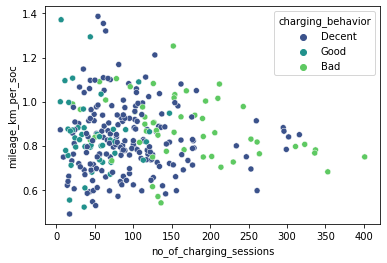

In [173]:
sns.scatterplot(x='no_of_charging_sessions',y='mileage_km_per_soc',data=model2,palette='viridis',hue='charging_behavior')

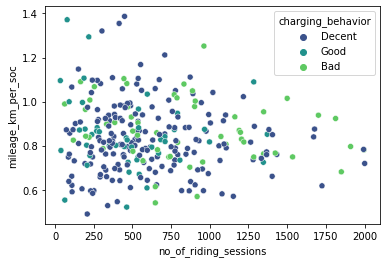

In [174]:
sns.scatterplot(x='no_of_riding_sessions',y='mileage_km_per_soc',data=model2,palette='viridis',hue='charging_behavior')

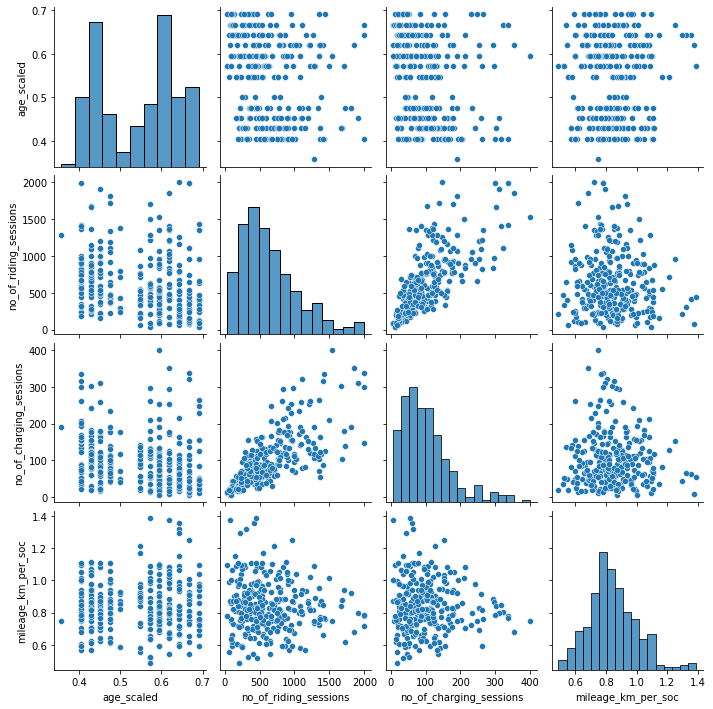

In [175]:
sns.pairplot(model2)

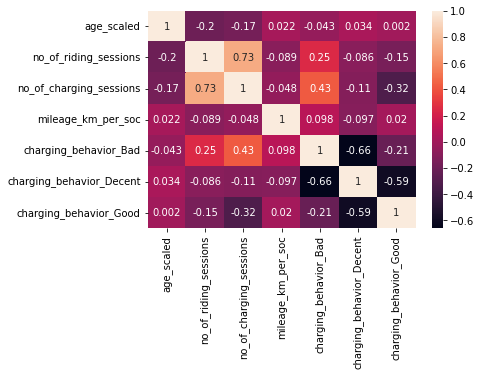

In [176]:
m2 = pd.get_dummies(model2)
sns.heatmap(m2.corr(),annot = True)

Text(0.5, 1.0, 'Model 2')

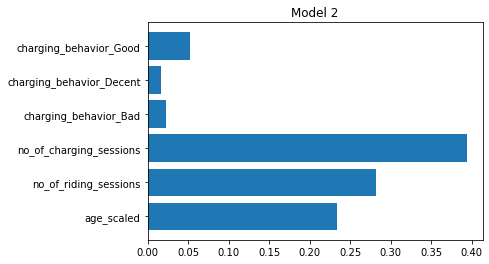

In [178]:
y = m2['mileage_km_per_soc']
x = m2.drop('mileage_km_per_soc',axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 10) 
regressor.fit(x,y)
regressor.feature_importances_
plt.barh(x.columns, regressor.feature_importances_)
plt.title('Model 2')

•	No_of_charging_session has the most influence on mileage followed by riding sessions and age scaled. Vehicles with good charging behaviour tends to have more mileage than vehicles with bad and decent charging behaviour.

#Model 3

In [179]:
model3.drop(['index','model_type'],axis = 'columns',inplace = True)

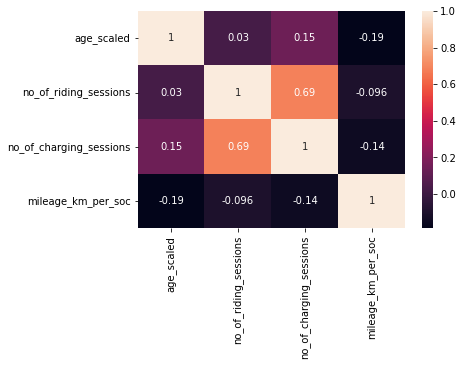

In [180]:
sns.heatmap(model3.corr(),annot = True)

•	Using scatter plot against age_scaled, no_of_charging_sessions and no_of_riding_sessions vs mileage. Removed some data points which I feel they look like outliers. 

Text(0, 0.5, 'mileage')

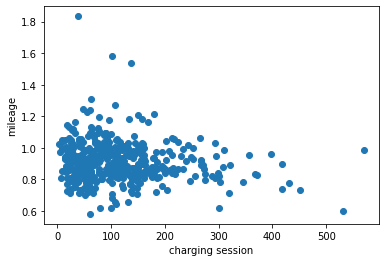

In [181]:
plt.scatter(model3['no_of_charging_sessions'],model3['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

In [182]:
model3 = model3[model3['mileage_km_per_soc'] < 1.4]
model3 =  model3[model3['no_of_charging_sessions']  < 500]

Text(0, 0.5, 'mileage')

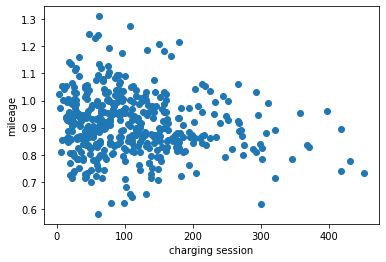

In [183]:
plt.scatter(model3['no_of_charging_sessions'],model3['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

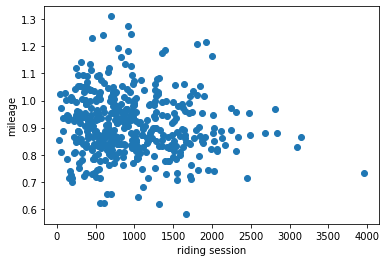

In [184]:
plt.scatter(model3['no_of_riding_sessions'],model3['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

In [185]:
model3 = model3[model3['no_of_riding_sessions'] < 3500]

Text(0, 0.5, 'mileage')

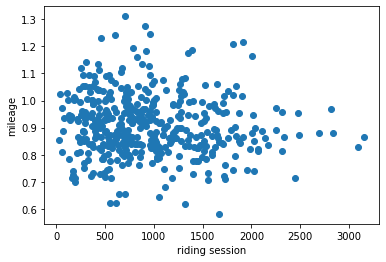

In [186]:
plt.scatter(model3['no_of_riding_sessions'],model3['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

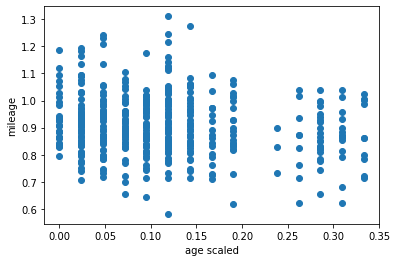

In [187]:
plt.scatter(model3['age_scaled'],model3['mileage_km_per_soc'])
plt.xlabel('age scaled')
plt.ylabel('mileage')

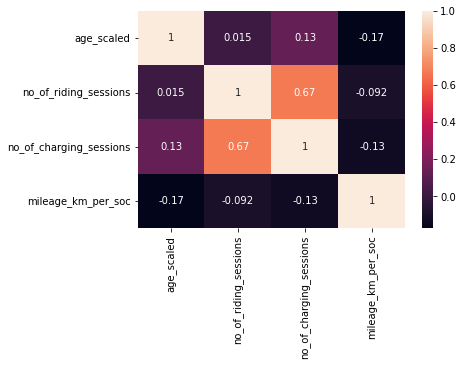

In [188]:
sns.heatmap(model3.corr(),annot = True)

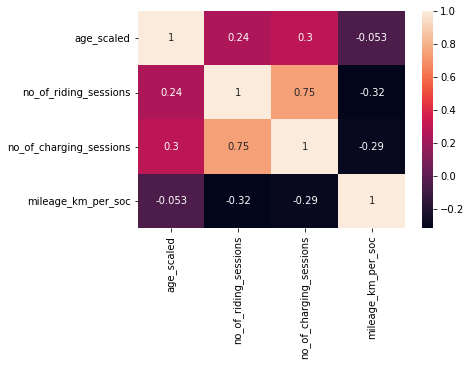

In [189]:
sns.heatmap((model3[model3['charging_behavior']== 'Good']).corr(),annot = True)

•	Model 3 vehicles with Good charging behaviour, no_riding_sessions and No_of_charging_sessions attribute are negatively correlated with the mileage.

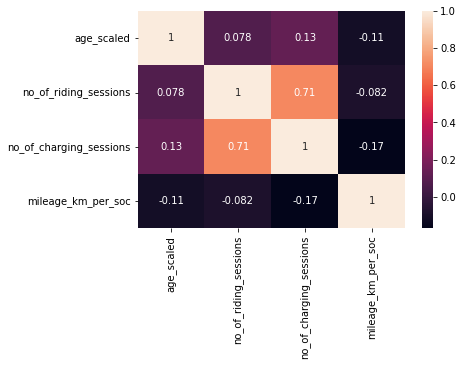

In [190]:
sns.heatmap((model3[model3['charging_behavior']== 'Bad']).corr(),annot = True)

•	Model 3 vehicles with Bad charging behaviour, age_scaled and 
No_of_charging_sessions attribute is negatively correlated with the mileage.


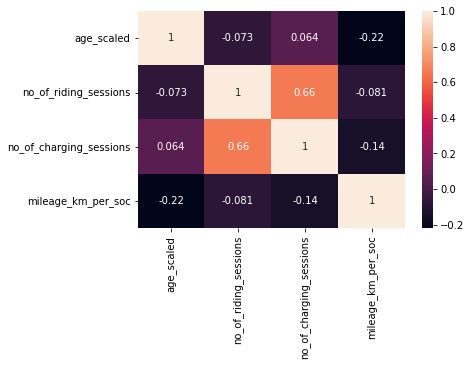

In [191]:
sns.heatmap((model3[model3['charging_behavior']== 'Decent']).corr(),annot = True)

•	Model 3 vehicles with Decent charging behaviour age_scaled and 
No_of_charging_sessions attribute is negatively correlated with the mileage.


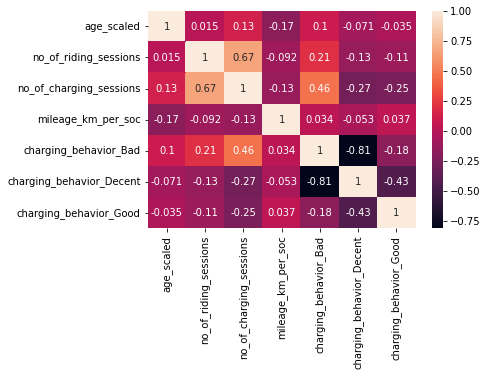

In [192]:
m3 = pd.get_dummies(model3)
sns.heatmap(m3.corr(), annot = True)

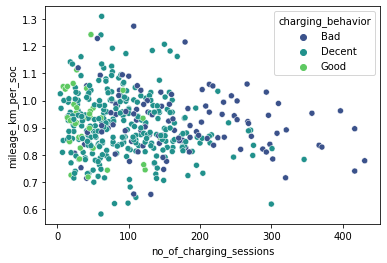

In [193]:
sns.scatterplot(x='no_of_charging_sessions',y='mileage_km_per_soc',data=model3,palette='viridis',hue='charging_behavior')

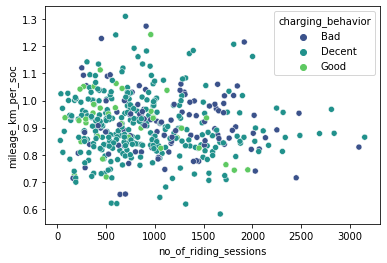

In [194]:
sns.scatterplot(x='no_of_riding_sessions',y='mileage_km_per_soc',data=model3,palette='viridis',hue='charging_behavior')

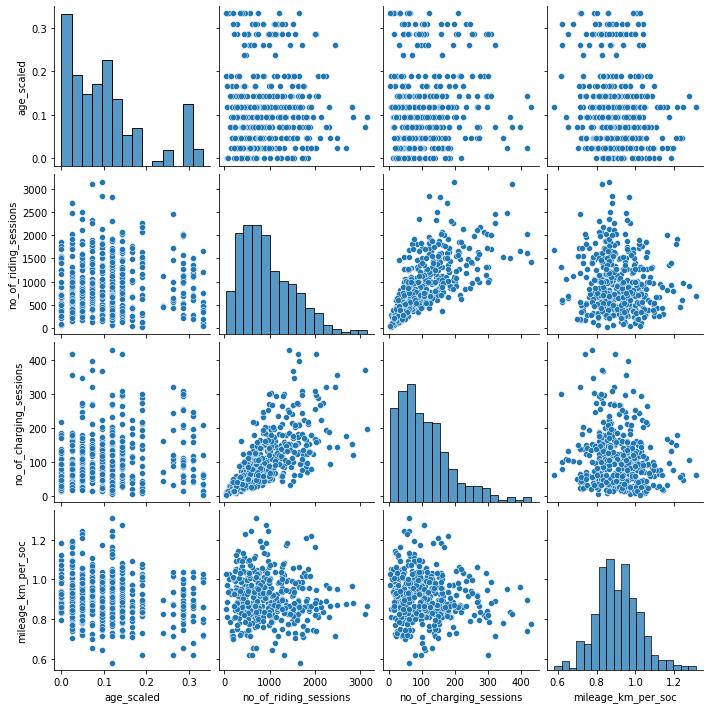

In [197]:
sns.pairplot(model3)

Text(0.5, 1.0, 'Model 3')

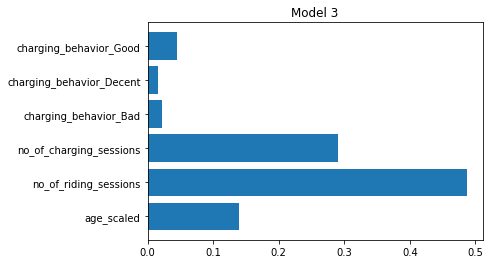

In [198]:
y = m3['mileage_km_per_soc']
x = m3.drop('mileage_km_per_soc',axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 10) 
regressor.fit(x,y)
regressor.feature_importances_
plt.barh(x.columns, regressor.feature_importances_)
plt.title('Model 3')

•	No_of_riding_session has the most influence on mileage followed by charging sessions and age scaled. Vehicles with good charging behaviour tends to have more mileage than vehicles with bad and decent charging behaviour.

#Model 4

In [199]:
model4.drop(['index','model_type'],axis = 'columns',inplace = True)

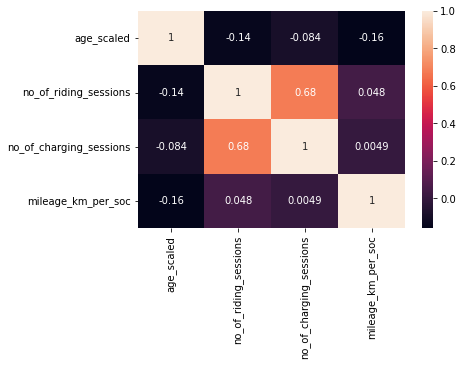

In [200]:
sns.heatmap(model4.corr(),annot = True)

Text(0, 0.5, 'mileage')

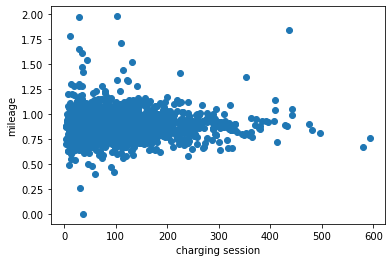

In [201]:
plt.scatter(model4['no_of_charging_sessions'],model4['mileage_km_per_soc'])
plt.xlabel('charging session')
plt.ylabel('mileage')

In [202]:
model4[model4['no_of_charging_sessions']  > 500]

,age_scaled,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
506,0.142857,2103,594,Bad,0.761057
631,0.119048,2402,580,Bad,0.670186


Text(0, 0.5, 'mileage')

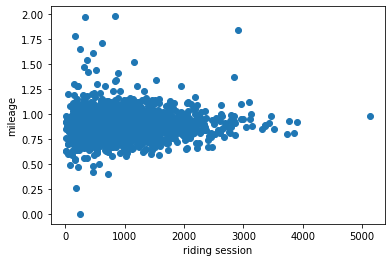

In [203]:
plt.scatter(model4['no_of_riding_sessions'],model4['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

In [204]:
model4 = model4[model4['no_of_riding_sessions']  <4000]

Text(0, 0.5, 'mileage')

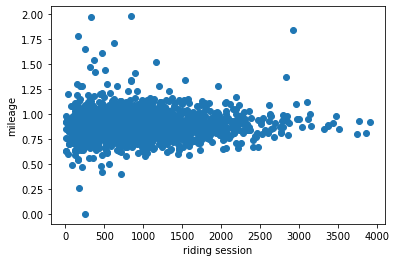

In [205]:
plt.scatter(model4['no_of_riding_sessions'],model4['mileage_km_per_soc'])
plt.xlabel('riding session')
plt.ylabel('mileage')

Text(0, 0.5, 'mileage')

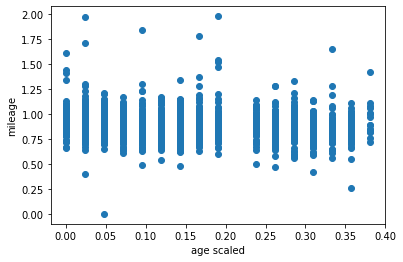

In [206]:
plt.scatter(model4['age_scaled'],model4['mileage_km_per_soc'])
plt.xlabel('age scaled')
plt.ylabel('mileage')

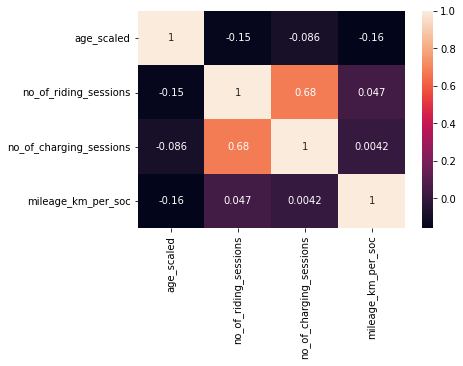

In [207]:
sns.heatmap(model4.corr(),annot = True)

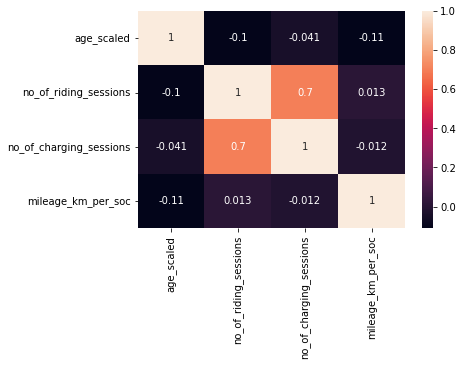

In [208]:
sns.heatmap((model4[model4['charging_behavior']== 'Good']).corr(),annot = True)

•	Model 4 vehicles with Good charging behaviour, age scaled is negatively correlated with mileage.

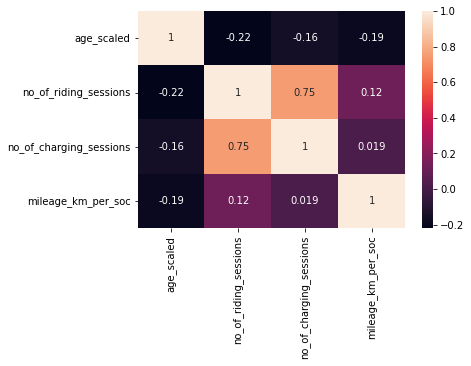

In [209]:
sns.heatmap((model4[model4['charging_behavior']== 'Bad']).corr(),annot = True)



•	Model 4 vehicles with Bad charging behaviour, age scaled is negatively correlated and no_of_riding_sessions are positively correlated with mileage.

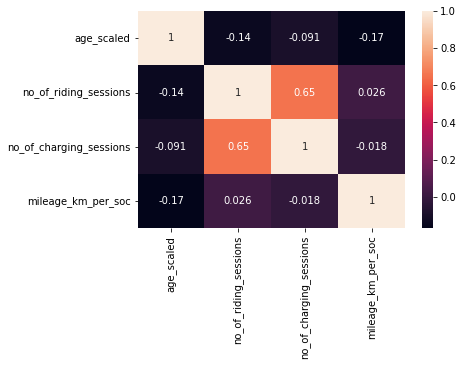

In [210]:
sns.heatmap((model4[model4['charging_behavior']== 'Decent']).corr(),annot = True)

•	Model 4 vehicles with Decent  charging behaviour, age scaled is negatively correlated and no_of_riding_sessions are positively correlated with mileage.

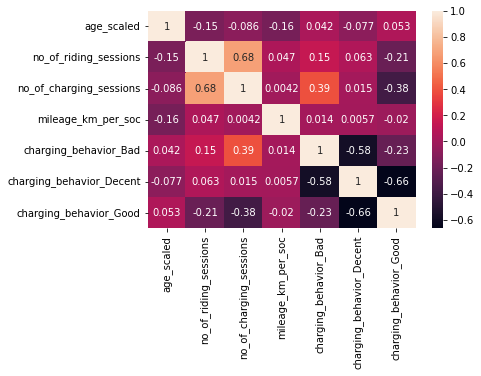

In [211]:
m4 = pd.get_dummies(model4)
sns.heatmap(m4.corr(), annot = True)

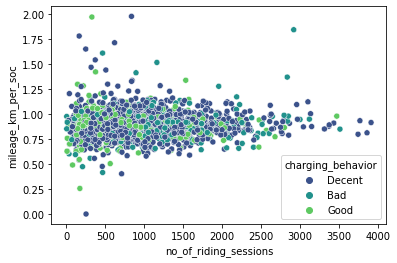

In [212]:
sns.scatterplot(x='no_of_riding_sessions',y='mileage_km_per_soc',data=model4,palette='viridis',hue='charging_behavior')

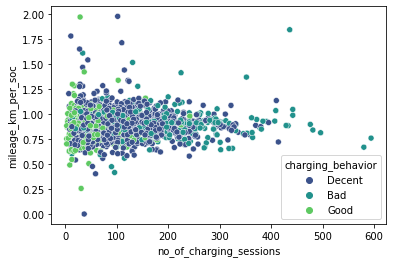

In [213]:
sns.scatterplot(x='no_of_charging_sessions',y='mileage_km_per_soc',data=model4,palette='viridis',hue='charging_behavior')

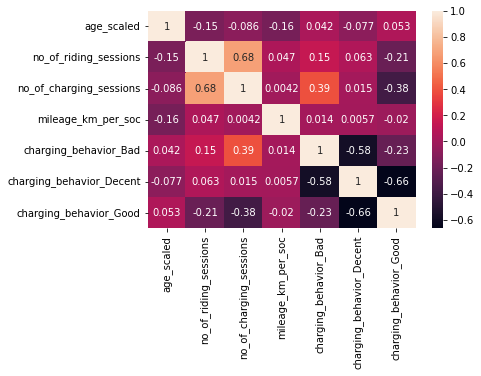

In [214]:
m4 = pd.get_dummies(model4)
sns.heatmap(m4.corr(), annot = True)

Text(0.5, 1.0, 'Model 4')

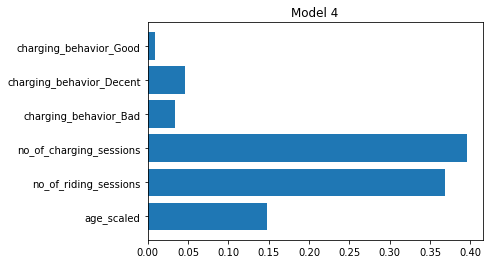

In [215]:
y = m4['mileage_km_per_soc']
x = m4.drop('mileage_km_per_soc',axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 10) 
regressor.fit(x,y)
regressor.feature_importances_
plt.barh(x.columns, regressor.feature_importances_)
plt.title('Model 4')

•	No_of_charging_session has the most influence on mileage followed by riding sessions and age scaled. Vehicles with decent charging behaviour tends to have more mileage than vehicles with bad and decent charging behaviour.